# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

## 2 - Precision

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128` (note: `np.float128` sometimes gives an error with `np.roll`!). Explain the error slopes. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from nm_lib import nm_lib as nm
plt.style.use('seaborn-v0_8-whitegrid')

def h(x, floattype):
    """Function to differentiate."""
    return np.cos( (np.pi * (x - 1) ) / 2 ) * np.exp( - ( (x - 3) / 2.5)**2 )

def analytical(xx, floattype):
    """Analytical derivative for comparison."""
    return np.exp( -floattype(0.16) * (-3 + xx)**2) * (floattype(1.5708) * np.cos((np.pi*xx) / 2) \
                   - (-floattype(0.96) + floattype(0.32) * xx) * np.sin((np.pi * xx) / 2))

def calculate_error(nint, floattype):
    """Calculate the error in the derivative 
    
    Parameters
    ----------
    nint : `int`
        Number of intervals
    floattype : `type`
        Type of float to use`
    
    Returns
    -------
    error : `float`
        The error in the derivative
    """
    x0 = floattype(-4.0)
    xf = floattype(10.0)
    nump = nint + 1
    xx = np.arange(nump)/(nump-1) * (xf-x0) + x0
    pxl = xx[1] - xx[0]
    hp = nm.deriv_dnw(xx, h(xx, floattype))

    return np.max(np.abs(hp - analytical(xx+pxl/2, floattype)))

In [11]:
def floats_comparison(floattype, nints):
    r"""Compare the error of the numerical derivative for different float types.
    
    Parameters
    ----------
    floattype : `type`
        The type of float to use for the calculation.
    nints : `list of int`
        The number of intervals to use for the numerical derivative.
        
    Returns
    -------
    errors : `list of float`
        The error for each number of intervals.
    """

    errors = []

    for n in nints:
        errors.append(floattype(calculate_error(n, floattype)))

    return errors


In [12]:
nints  = [1e6, 2e6, 3e6, 4e6, 5e6] 

err16 = floats_comparison(np.float16, nints)
err32 = floats_comparison(np.float32, nints)
err64 = floats_comparison(np.float64, nints)

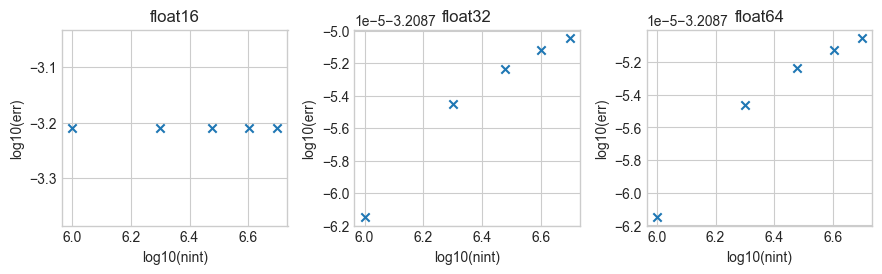

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))

ax[0].scatter(np.log10(nints), np.log10(err16), marker='x'); ax[0].set(title='float16', xlabel='log10(nint)', ylabel='log10(err)')
ax[1].scatter(np.log10(nints), np.log10(err32), marker='x'); ax[1].set(title='float32', xlabel='log10(nint)', ylabel='log10(err)')
ax[2].scatter(np.log10(nints), np.log10(err64), marker='x'); ax[2].set(title='float64', xlabel='log10(nint)', ylabel='log10(err)')

plt.tight_layout()

I do not think the `float16` works at all. 

<span style="color:green">JMS</span>.

<span style="color:blue">Good. Agree float16 is not able to resolve the calculations at any resolution. </span>.

<span style="color:red"> Could you explain what do you see for 32 and 64. Any idea why this behaviour. </span>.

<span style="color:orange">Minor comments: Add some minor comments in def functions, typically the description in functions are as follows</span>.

    r"""
    A sentences on what is the propose of the function.
    
    Requires
    ----------
    libraries or functions 

    Parameters
    ----------
    xx : `array`
        description and if applies what is the default values. 

    Returns
    ------- 
    t : `array`
        description 
    """

<span style="color:green">JMS</span>.

<span style="color:red">Still I have problems here with the size of the arrays.</span>.